# Dealing with Imbalanced Datasets 

In this kernel Our dataset is highly skewed towards non-fraud cases, There are 99.83% data of non-fraud class and rest as fraud class. 

If we directly apply our model and classifiers then it highly baised towards more data, Model is overfitting so to deal with this problem we want to make 50-50 sub dataframe ratio of each class 

## Different Techniques to deal with Imbalance - 

1. Random UnderSampling 
2. Near Miss Algorithm (UnderSampling)
3. Condensed Nearest Neighbor (UnderSampling)
4. SMOTE (Synthetic Minority Over-Sampling Technique)

### First Step to import all required libraries which we use later. 

In [ ]:
#importing libraries 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import matplotlib.patches as mpatches 

#Demensional Reduction and Clustering 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#Classifiers libraries  
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import collections

#Other Libraries 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced 
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, accuracy_score, classification_report 
from sklearn.model_selection import KFold, StratifiedKFold
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("creditcard.csv")
df.head()

In [2]:
#Describtion of each feature and class column. 

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
#Checking Null values

df.isnull().sum().max()

0

In [4]:
#Count of each class 

print("No. of Non-Fraud Transaction is: ",round(100*len(df.loc[df['Class']== 0])/len(df['Class']),2),"%")
print("No. of Fraud Transaction is: ", round(100*len(df.loc[df['Class']==1])/len(df['Class']),2),"%")

No. of Non-Fraud Transaction is:  99.83 %
No. of Fraud Transaction is:  0.17 %


## Understanding Our Data


**Note:** Notice how imbalance is our data. Most of the class is Non-Fraud. IF we apply any model to this dataset then it will highly predicting almost all the cases as Non-fraud but our main is to predict fraud more concisely. 

Text(0, 0.5, 'Number')

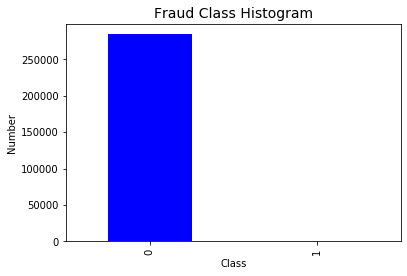

In [5]:
#Histogram of Class vs Number

value_counts = pd.value_counts(df['Class'])
value_counts.plot(kind="bar",color=['b','k'])
plt.title("Fraud Class Histogram",fontsize=14)
plt.xlabel("Class")
plt.ylabel("Number")

### Distribution Check 

**Distribution:** As we can see that how skewed is our features are. Time and amount features are highly skewed. We can use different techniques that can help the distributions be less skewed.

Text(0.5, 1.0, 'Time Distribution')

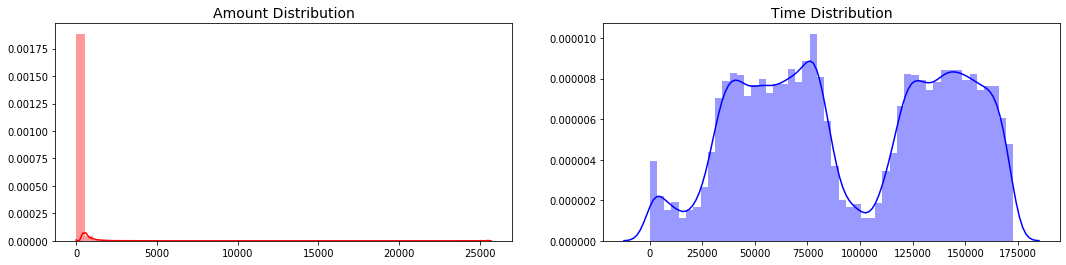

In [6]:
#Distribution of features 
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(df['Amount'].values,ax=ax[0],color='r')
ax[0].set_title('Amount Distribution',fontsize=14)

sns.distplot(df['Time'].values,ax=ax[1],color='b')
ax[1].set_title('Time Distribution',fontsize=14)

## Data Preprocessing 

#### Scaling the time and amount column using standard scaler. 

In [7]:
#Scaling to mean=0 and std=1
from sklearn.preprocessing import RobustScaler

df['ScaledAmount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['ScaledTime'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount','Time'],axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,ScaledAmount,ScaledTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


### Spliting our Original data into train and test  

In [8]:
#Spliting Data in train test 

from sklearn.model_selection import train_test_split

X = df.drop('Class',axis=1)
Y = df['Class']

Original_Xtrain, Original_Xtest, Original_Ytrain, Original_Ytest = train_test_split(X,Y,test_size=0.3,random_state=52)

### Random Undersampling :

* We are randomly choosing from majority class, same number of dataset  as minority class.
* There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
* There is a lot of imformation loss in this case. (we are reducing 284315 to 492).

In [9]:
#Random Under-Sampling 

print("No. of Fraud Transactions: " ,df['Class'].value_counts()[1])
print("No. of Non-Fraud Transactions: ", df['Class'].value_counts()[0])

df.sample(frac=1)

fraud = df.loc[df['Class']==1]
non_fraud = df.loc[df['Class']==0][:492]

new_distributed_data = pd.concat([fraud,non_fraud])
new_df = new_distributed_data.sample(frac=1,random_state=52)
new_df.head()

No. of Fraud Transactions:  492
No. of Non-Fraud Transactions:  284315


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,ScaledAmount,ScaledTime
176049,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,-1.531608,...,-1.015232,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,1,29.398030,0.445447
154670,-2.296987,4.064043,-5.957706,4.680008,-2.080938,-1.463272,-4.490847,1.029246,-1.593249,-8.993811,...,0.975398,-0.625530,-0.535181,0.247435,0.160400,0.969582,0.335041,1,1.145812,0.209084
156,-0.646513,1.004199,1.616224,-0.099628,-0.122477,-0.671327,0.656183,0.009755,-0.635963,-0.047364,...,-0.420046,0.061424,0.520997,-0.238845,0.030135,0.140481,0.101163,0,-0.098093,-0.993832
143335,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1,3.226717,0.006967
127,-0.655264,0.409899,1.289156,-0.325043,0.545669,-0.349811,0.648240,0.036063,0.078701,-0.829167,...,-0.477390,-0.126525,-0.443628,-0.012118,0.143173,0.049783,0.118280,0,0.146859,-0.994044


Text(0, 0.5, 'Number')

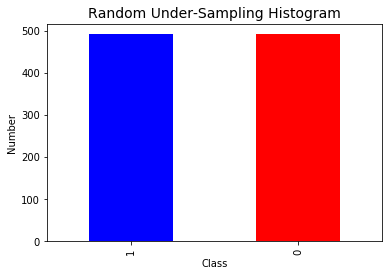

In [10]:
#Equal count after random undersampling 

value_count = pd.value_counts(new_df['Class'])
value_count.plot(kind='bar',color=['b','r'])
plt.title("Random Under-Sampling Histogram",fontsize=14)
plt.xlabel("Class")
plt.ylabel("Number")

### Correlation Matrics 


* In this section we are finding those features which are **highly correlated** (may be highly positive or highly negative) with our **target column** that is class and plot **boxplot** of these features, after that we **remove outliers** of these features as these features will play a **significant role to predict fraud.** (class=1) 

Text(0.5, 1, 'Random Under-Sampling Correlation Matrix')

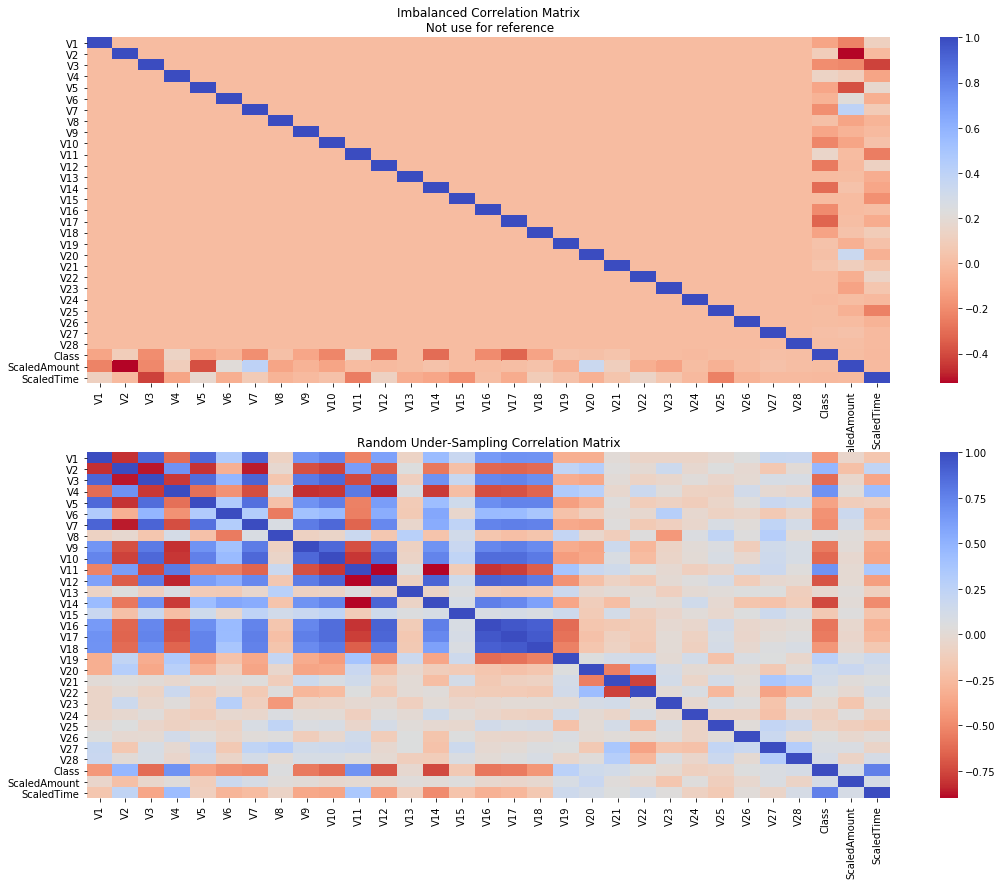

In [11]:
#Correlaion Matrics

fig, ax = plt.subplots(2,1,figsize=(18,14))

corr = df.corr();
sns.heatmap(corr,cmap='coolwarm_r',annot_kws={'size':20},ax=ax[0])
ax[0].set_title("Imbalanced Correlation Matrix\n Not use for reference")

corr1 = new_df.corr();
sns.heatmap(corr1,cmap='coolwarm_r',annot_kws={'size':20},ax=ax[1])
ax[1].set_title("Random Under-Sampling Correlation Matrix")

### Negativily Correlated with Class

* V3, V10, V12 and V14 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

Text(0.5, 1.0, 'V14 vs Class')

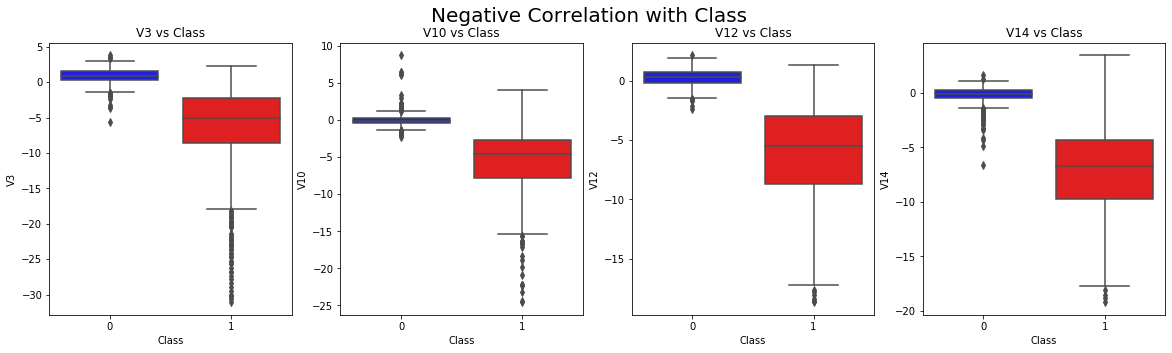

In [12]:
#Negativily Correlated with the class.
f, ax = plt.subplots(1,4,figsize=(20,5))
f.suptitle("Negative Correlation with Class",fontsize=20)

sns.boxplot(x='Class',y='V3',data=new_df,ax=ax[0],palette=['b','r'])
ax[0].set_title('V3 vs Class')

sns.boxplot(x='Class',y='V10',data=new_df,ax=ax[1],palette=['b','r'])
ax[1].set_title('V10 vs Class')

sns.boxplot(x='Class',y='V12',data=new_df,ax=ax[2],palette=['b','r'])
ax[2].set_title('V12 vs Class')

sns.boxplot(x='Class',y='V14',data=new_df,ax=ax[3],palette=['b','r'])
ax[3].set_title('V14 vs Class')


### Positivily Correlated with Class

* V2, V4, V11 and V19 are positivily correlated. Notice how the higher these values are, the more likely result will be a fraud transaction.

Text(0.5, 1.0, 'V19 vs Class')

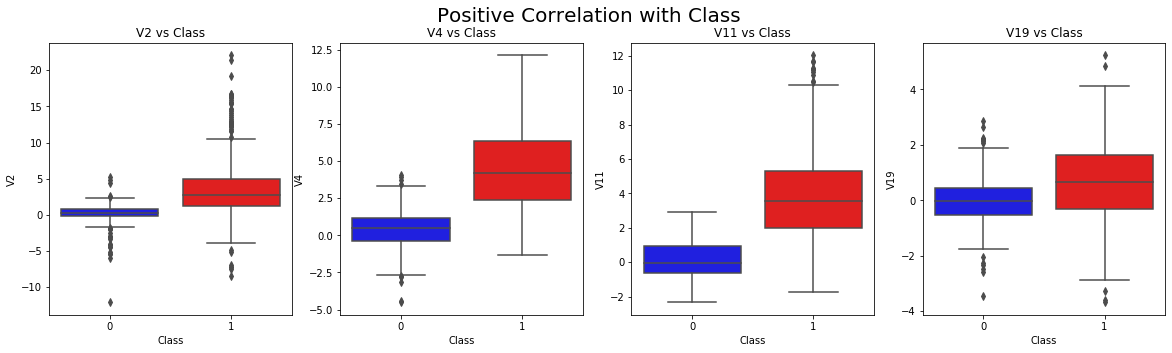

In [13]:
#Positivily Correlated with the class.
f, ax = plt.subplots(1,4,figsize=(20,5))
f.suptitle("Positive Correlation with Class",fontsize=20)

sns.boxplot(x='Class',y='V2',data=new_df,ax=ax[0],palette=['b','r'])
ax[0].set_title('V2 vs Class')

sns.boxplot(x='Class',y='V4',data=new_df,ax=ax[1],palette=['b','r'])
ax[1].set_title('V4 vs Class')

sns.boxplot(x='Class',y='V11',data=new_df,ax=ax[2],palette=['b','r'])
ax[2].set_title('V11 vs Class')

sns.boxplot(x='Class',y='V19',data=new_df,ax=ax[3],palette=['b','r'])
ax[3].set_title('V19 vs Class')

Text(0.5, 1.0, 'V4 distribution\n (Fraud Transaction)')

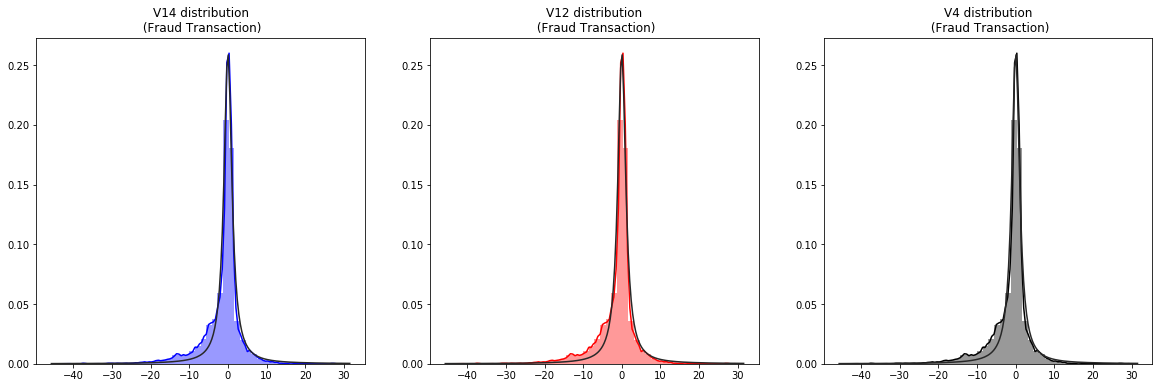

In [14]:
#plot distribution function of highly correlated with class.
from scipy.stats import t

f, ax = plt.subplots(1,3, figsize=(20, 6))

V14_fraud_dist = new_df.loc[new_df['Class']==1].values
sns.distplot(V14_fraud_dist,ax=ax[0],fit=t,color='b')
ax[0].set_title("V14 distribution\n (Fraud Transaction)")

V12_fraud_dist = new_df.loc[new_df['Class']==1].values
sns.distplot(V12_fraud_dist,ax=ax[1],fit=t,color='r')
ax[1].set_title("V12 distribution\n (Fraud Transaction)")

V4_fraud_dist = new_df.loc[new_df['Class']==1].values
sns.distplot(V4_fraud_dist,ax=ax[2],fit=t,color='k')
ax[2].set_title("V4 distribution\n (Fraud Transaction)")



### Anomaly Detection 

* Removing the extreme outliers (**25percentile - 1.5IQR < outlier < 75percentile + 1.5IQR**) from highly correlated with our target column 

In [15]:
#Anomaly Detection 

#V14 Outlier Removal 
V14_fraud = new_df['V14'].loc[new_df['Class']==1].values
q75,q25 = np.percentile(V14_fraud,75),np.percentile(V14_fraud,25)
print('25th Percentile: {} | 75th Percentile: {}'.format(q25,q75))
v14_iqr = q75-q25
print('IQR:',v14_iqr)

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [] 
for x in V14_fraud:
    if(x < v14_lower or x > v14_upper):
        outliers.append(x)

print('No. of Outliers: ',len(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)

print('---' * 45)

#V12 Outlier Removal. 
V12_fraud = new_df['V12'].loc[new_df['Class']==1].values
q75,q25 = np.percentile(V12_fraud,75),np.percentile(V12_fraud,25)
print('25th Percentile: {} | 75th Percentile: {}'.format(q25,q75))
v12_iqr = q75-q25
print('IQR:',v12_iqr)

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('Cut Off: {}'.format(v12_cut_off))
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers = [] 
for x in V12_fraud:
    if(x < v12_lower or x > v12_upper):
        outliers.append(x)

print('No. of Outliers: ',len(outliers))

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)

print('---' * 45)  

#V4 Outlier Removal.
V4_fraud = new_df['V4'].loc[new_df['Class']==1].values
q75,q25 = np.percentile(V4_fraud,75),np.percentile(V4_fraud,25)
print('25th Percentile: {} | 75th Percentile: {}'.format(q25,q75))
v4_iqr = q75-q25
print('IQR:',v4_iqr)

v4_cut_off = v4_iqr * 1.5
v4_lower, v4_upper = q25 - v4_cut_off, q75 + v4_cut_off
print('Cut Off: {}'.format(v4_cut_off))
print('V4 Lower: {}'.format(v4_lower))
print('V4 Upper: {}'.format(v4_upper))

outliers = [] 
for x in V4_fraud:
    if(x < v4_lower or x > v4_upper):
        outliers.append(x)

print('No. of Outliers: ',len(outliers))

new_df = new_df.drop(new_df[(new_df['V4'] > v4_upper) | (new_df['V4'] < v4_lower)].index)



25th Percentile: -9.692722964972385 | 75th Percentile: -4.282820849486866
IQR: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
No. of Outliers:  4
---------------------------------------------------------------------------------------------------------------------------------------
25th Percentile: -8.67303320439115 | 75th Percentile: -2.893030568676315
IQR: 5.780002635714835
Cut Off: 8.670003953572252
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
No. of Outliers:  4
---------------------------------------------------------------------------------------------------------------------------------------
25th Percentile: 2.33384416100627 | 75th Percentile: 6.269028891989485
IQR: 3.9351847309832153
Cut Off: 5.902777096474823
V4 Lower: -3.568932935468553
V4 Upper: 12.171805988464309
No. of Outliers:  0


#### Boxplot after outliear removal 

Text(0.5, 1.0, 'V4 vs Class')

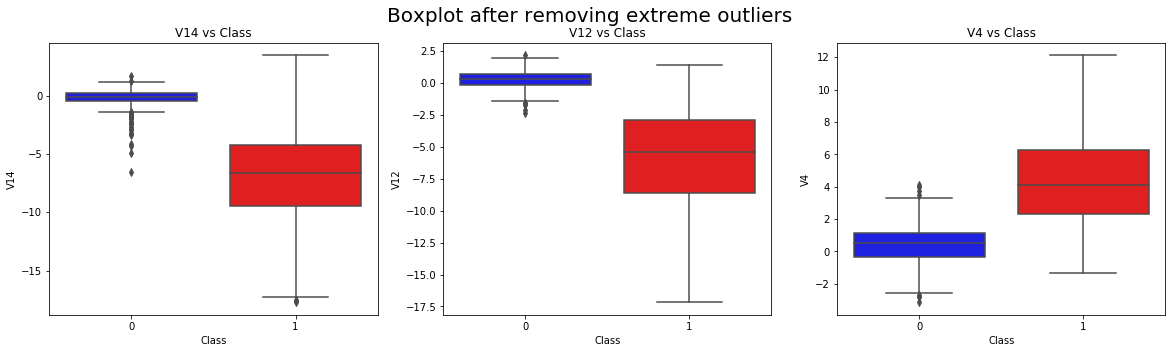

In [16]:
#BoxPlot after removal

f, ax = plt.subplots(1,3,figsize=(20,5))
f.suptitle("Boxplot after removing extreme outliers",fontsize=20)

sns.boxplot(x='Class',y='V14',data=new_df,ax=ax[0],palette=['b','r'])
ax[0].set_title('V14 vs Class')

sns.boxplot(x='Class',y='V12',data=new_df,ax=ax[1],palette=['b','r'])
ax[1].set_title('V12 vs Class')

sns.boxplot(x='Class',y='V4',data=new_df,ax=ax[2],palette=['b','r'])
ax[2].set_title('V4 vs Class')


## Dimension Reduction and clustering 

* As the original data has 28 dimension (features) so to make data feeling or intuition out of it we will reduce our data into 2 dimension. 

### Techniques to Dimension Reduction: 

1. T-SNE (T-distribution Stochastic Neighbor Embedding) 
2. PCA (Princial Component Analysis)


In [17]:
#Dimension Rduction and Clustering 

import time
X = new_df.drop('Class',axis=1)
Y = new_df['Class']

#TSNE
t0 = time.time()
X_reduced_TSNE = TSNE(n_components=2,random_state=52).fit_transform(X.values)
t1 = time.time()
print('Time taken for execution: {} s'.format(t1-t0))

#PCA
t2 = time.time()
X_reduced_PCA = PCA(n_components=2,random_state=52).fit_transform(X.values)
t3 = time.time()
print("Time taken for PCA: {} s".format(t3-t2))


Time taken for execution: 11.310746192932129 s
Time taken for PCA: 0.7579729557037354 s


#### t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset.

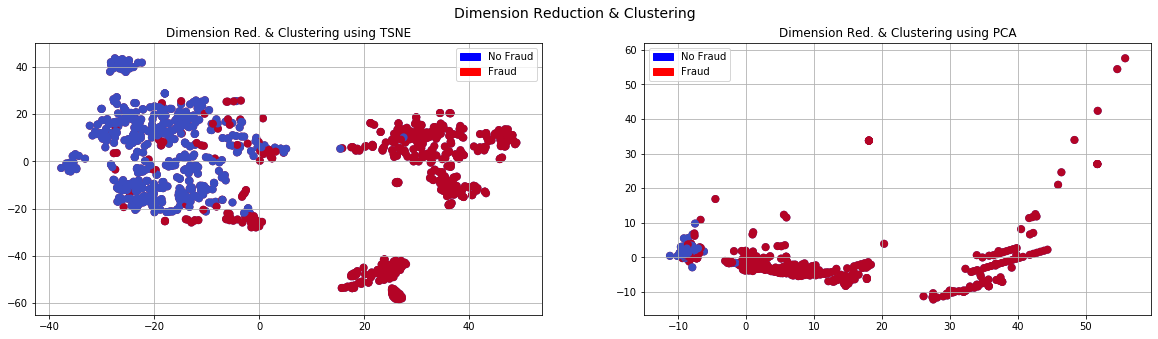

In [18]:
import matplotlib.patches as mpatches

f,ax = plt.subplots(1,2,figsize=(20,5))
f.suptitle("Dimension Reduction & Clustering",fontsize=14)

blue_patch = mpatches.Patch(color='b', label='No Fraud')
red_patch = mpatches.Patch(color='r', label='Fraud')

ax[0].scatter(X_reduced_TSNE[:,0],X_reduced_TSNE[:,1],c=(Y==0),cmap='coolwarm',label='No Fraud',linewidths=2)
ax[0].scatter(X_reduced_TSNE[:,0],X_reduced_TSNE[:,1],c=(Y==1),cmap='coolwarm',label='Fraud',linewidths=2)
ax[0].set_title("Dimension Red. & Clustering using TSNE")
ax[0].grid(True)
ax[0].legend(handles=[blue_patch, red_patch])

ax[1].scatter(X_reduced_PCA[:,0],X_reduced_PCA[:,1],c=(Y==0),cmap='coolwarm',label='No Fraud',linewidths=2)
ax[1].scatter(X_reduced_PCA[:,0],X_reduced_PCA[:,1],c=(Y==1),cmap='coolwarm',label='Fraud',linewidths=2)
ax[1].set_title("Dimension Red. & Clustering using PCA")
ax[1].grid(True)
ax[1].legend(handles=[blue_patch, red_patch])

plt.show()

In [19]:
from sklearn.model_selection import train_test_split

new_df.sample(frac=1)
X = new_df.drop('Class',axis=1)
Y = new_df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

## Classifiers 

In [20]:
#Classifier Dictionary 

classifiers = {
    'LogisticRegression':LogisticRegression(),
    'SupportVectorClassifier': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNearest' : KNeighborsClassifier()
}

In [21]:
from sklearn.model_selection import cross_val_score

for key,classifier in classifiers.items():
    classifier.fit(X_train.values,Y_train.values)
    training_score = cross_val_score(classifier,X_train.values,Y_train.values,cv=5)
    print("The {} has a training score of {}% ".format(key,round(training_score.mean(),2)*100))
    

The LogisticRegression has a training score of 98.0% 
The SupportVectorClassifier has a training score of 94.0% 
The DecisionTree has a training score of 100.0% 
The KNearest has a training score of 94.0% 


### Use GridSearchCV to find the best parameters of each argument of Classifier. 

In [22]:
#Use GridSearchCV to obtain best parameters
from sklearn.model_selection import GridSearchCV

#logistic regression params
log_reg_params = {"penalty": ['l1','l2'],'solver':['liblinear'],'C':[0.01,0.1,1,10,100,1000]}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train.values,Y_train.values)
log_reg = grid_log_reg.best_estimator_
print("Best parameters: ",log_reg);

#svc parameters
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params,cv=5)
grid_svc.fit(X_train.values, Y_train.values)
svc = grid_svc.best_estimator_
print("Best parameters",svc)

#Decision Tree Classifier
tree_params = {"criterion": ['gini','entropy'],'max_depth':list(range(2,4,1)),"min_samples_leaf":list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(),tree_params,cv=5)
grid_tree.fit(X_train.values,Y_train.values)
tree_par = grid_tree.best_estimator_
print("Best parameters",tree_par)

#KNearest Classifiers
Knearest_params = {'n_neighbors':list(range(2,5,1)),'algorithm':['brute','auto','ball_tree','kd_tree']}
grid_Knear = GridSearchCV(KNeighborsClassifier(),Knearest_params,cv=5)
grid_Knear.fit(X_train.values,Y_train.values)
Knear_par = grid_Knear.best_estimator_
print("Best parameters",Knear_par)


Best parameters:  LogisticRegression(C=10, penalty='l1', solver='liblinear')
Best parameters SVC(C=0.9, kernel='linear')
Best parameters DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)
Best parameters KNeighborsClassifier(algorithm='brute', n_neighbors=3)


#### There is an increase in accuracy of model after applying best estimators 

In [23]:
#Training Score after best estimators of each classifiers.

log_reg_score = cross_val_score(log_reg, X_train, Y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(Knear_par, X_train, Y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, Y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_par, X_train, Y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  99.18%
Knears Neighbors Cross Validation Score 94.25%
Support Vector Classifier Cross Validation Score 99.59%
DecisionTree Classifier Cross Validation Score 99.86%


### Applying NearMiss Algorithm for undersampling. 

* It selects examples of majority class based on the distance between majority class examples and minority class examples. 

**Note:** As you can see I make a pipeline containing nearmiss and log_reg Becoz We have to apply any undersampling or oversampling technique to our train data (at the time of cross validation not before), always seperate out our test data and make free of any technique. 

In [25]:

undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

undersample_Xtrain,undersample_Xtest,undersample_ytrain,undersample_ytest = train_test_split(undersample_X,undersample_y,test_size=0.2,random_state=42)
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

sss = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

for train_index,test_index in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'),log_reg)
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train_index],undersample_ytrain[train_index].ravel())
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test_index])
    
    undersample_accuracy.append(accuracy_score(undersample_ytrain[test_index], undersample_prediction))
    undersample_precision.append(precision_score(undersample_ytrain[test_index], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test_index], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test_index], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test_index], undersample_prediction))


In [26]:
#learning Curve 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve 

def plot_learning_curve(estimator1,estimator2,estimator3,estimator4,X,y,ylim,cv,n_jobs,train_sizes=np.linspace(0.1,1,5)):
    
    f, ((ax1,ax2) , (ax3,ax4)) = plt.subplots(2,2,figsize=(18,14),sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt
    
    


### Learning Curve

* Telling the whether our model is overfitting or underfitting or correctly fit. 

<module 'matplotlib.pyplot' from 'C:\\Users\\user\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

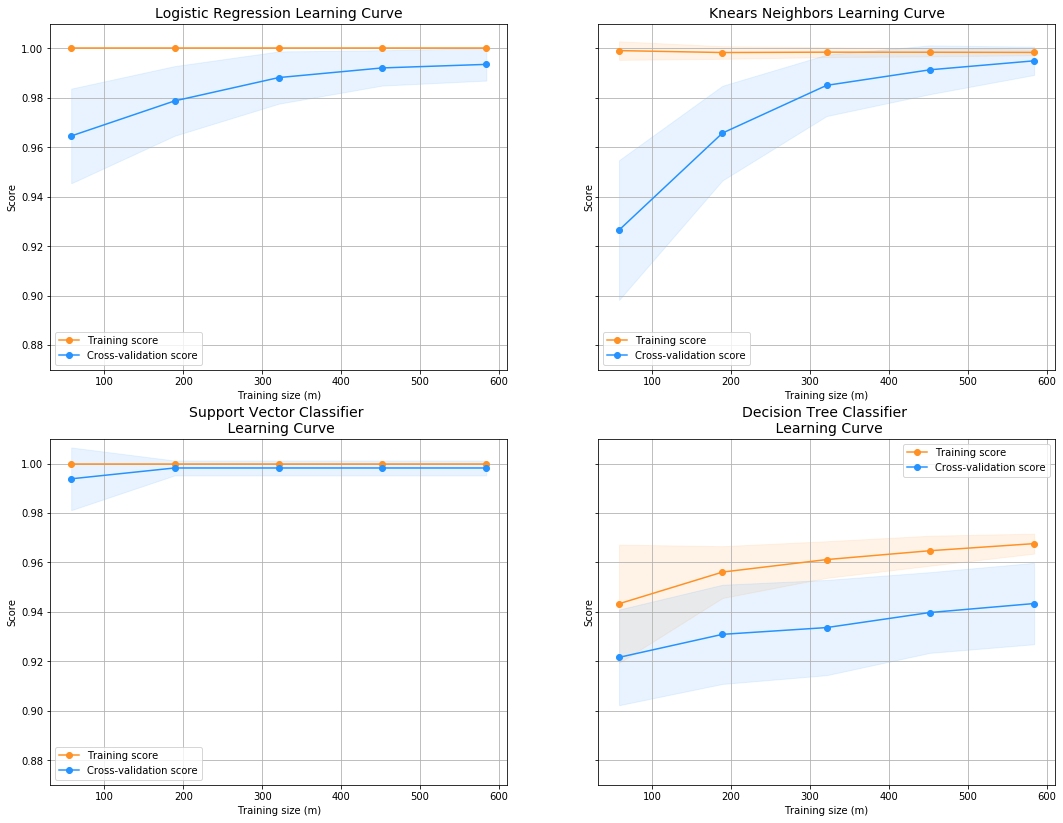

In [27]:
cv = ShuffleSplit(n_splits= 100,test_size=0.2,random_state=42)
plot_learning_curve(log_reg, svc, tree_par, Knear_par, X_train, Y_train,(0.87, 1.01), cv=cv, n_jobs=4)

In [28]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict 

log_reg_pred = cross_val_predict(log_reg, X_train, Y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(Knear_par, X_train, Y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, Y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_par, X_train, Y_train, cv=5)

In [29]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(Y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(Y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(Y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(Y_train, tree_pred))

Logistic Regression:  0.9993844259772238
KNears Neighbors:  0.9420985068576447
Support Vector Classifier:  0.9977103649152834
Decision Tree Classifier:  0.9986149584487535


In [30]:
log_fpr, log_tpr, log_threshold = roc_curve(Y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(Y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(Y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(Y_train, tree_pred)

def plotting_roc_curve(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(Y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(Y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(Y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(Y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

### ROC Curve of each classifier applied on random undersampling data 

* In the case of imbalance dataset we have to more focus on recall-precision curve than roc 

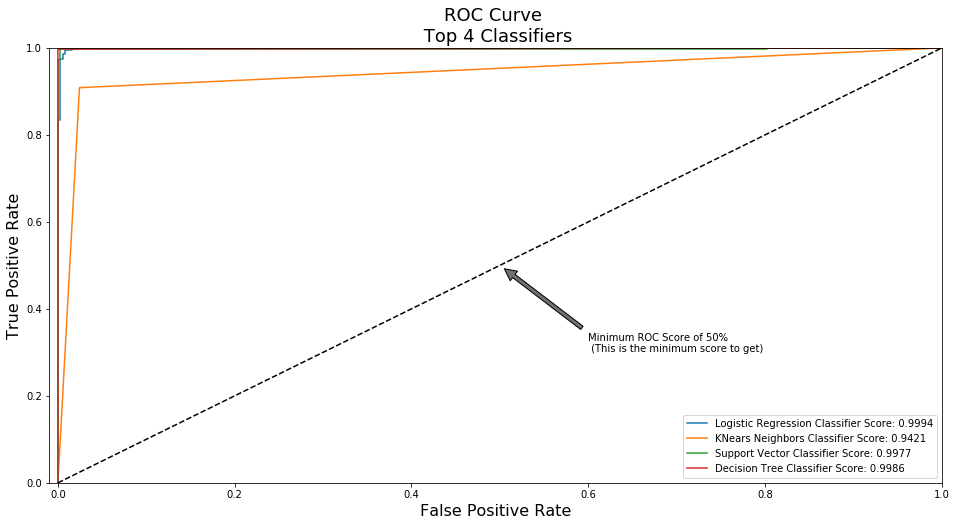

In [31]:
plotting_roc_curve(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)

In [32]:
from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(Y_train,log_reg_pred)

#### how overfitting our model is, when predicting on original test set there is very low f1 score 

In [33]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
Y_pred = log_reg.predict(X_train)

#Overfitting (Random Sampling)
print('Overfitting: \n')
print("Accuracy Score of random sampling : {}".format(round(accuracy_score(Y_train,Y_pred),2)))
print("Recall Score of random sampling: {}".format(round(recall_score(Y_train,Y_pred),2)))
print("Precision Score of random sampling: {}".format(round(precision_score(Y_train,Y_pred),2)))
print("F1 Score of random sampling: {}".format(round(f1_score(Y_train,Y_pred),2)))
print("---"*45)

#NearMiss (Undersampling Technique, Test our data which is apart from undersampling).
print('How it should be using: \n')
print("Accuracy Score of random sampling : {}".format(round(np.mean(undersample_accuracy),2)))
print("Recall Score of random sampling: {}".format(round(np.mean(undersample_recall),2)))
print("Precision Score of random sampling: {}".format(round(np.mean(undersample_precision),2)))
print("F1 Score of random sampling: {}".format(round(np.mean(undersample_f1),2)))
print("---"*45)


Overfitting: 

Accuracy Score of random sampling : 0.73
Recall Score of random sampling: 0.95
Precision Score of random sampling: 0.65
F1 Score of random sampling: 0.78
---------------------------------------------------------------------------------------------------------------------------------------
How it should be using: 

Accuracy Score of random sampling : 0.58
Recall Score of random sampling: 0.93
Precision Score of random sampling: 0.0
F1 Score of random sampling: 0.01
---------------------------------------------------------------------------------------------------------------------------------------


In [34]:
undersample_y_score = log_reg.decision_function(Original_Xtest)

In [35]:
from sklearn.metrics import average_precision_score

undersample_avgprecision_score = average_precision_score(Original_Ytest,undersample_y_score)
print("Average Percsion score is:",round(undersample_avgprecision_score,2))

Average Percsion score is: 0.03


#### Precision Recall Curve 

Testing on Original test samply seperate from any undersamply technique. 

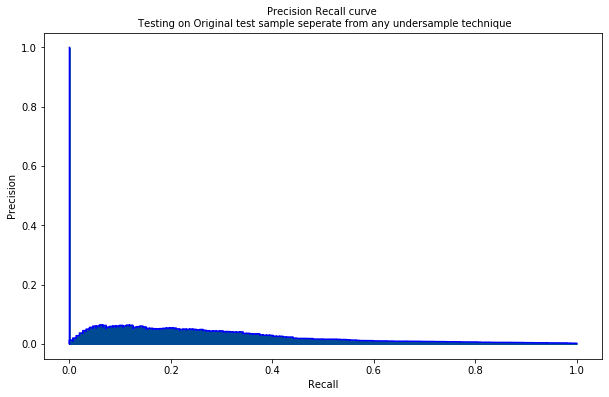

In [36]:
from sklearn.metrics import precision_recall_curve 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))

precision, recall, threshold = precision_recall_curve(Original_Ytest,undersample_y_score)

plt.step(recall, precision, color='b',where='post')
plt.fill_between(recall, precision, step='post',color='#004a93')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision Recall curve \n Testing on Original test sample seperate from any undersample technique", fontsize=10)
plt.show()

## SMOTE 

SMOTE is an oversampling technique, It first selects randomly a minority class example and find k nearest neighbor of minority class then generate points on the line joining these k minority class. Thus generating equal no. of each class datapoints. We can change sampling strategy argument for different ratio between class. 

**Note:** Apply this technique on the training set of crossvalidation, and make free to validation set to overcome overfitting. 

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print("No. of training Datasets: {} {}".format(len(Original_Xtrain), len(Original_Ytrain)))
print("No. of test Datasets: {} {}".format(len(Original_Xtest), len(Original_Ytest)))

Original_Xtrain = Original_Xtrain.values
Original_Xtest = Original_Xtest.values
Original_Ytrain = Original_Ytrain.values
Original_Ytest = Original_Ytest.values

abc = StratifiedKFold(n_splits=5,shuffle=False,random_state=None)
accuracy_ls = []
precision_ls = []
recall_ls = []
f1_score_ls = []
auc_ls = []

log_reg_sm = RandomizedSearchCV(LogisticRegression(),log_reg_params,n_iter=4)


for train,test in abc.split(Original_Xtrain,Original_Ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'),log_reg_sm)
    model = pipeline.fit(Original_Xtrain[train],Original_Ytrain[train].ravel())
    best_par = log_reg_sm.best_estimator_
    y_pred = best_par.predict(Original_Xtrain[test])
    
    accuracy_ls.append(pipeline.score(Original_Xtrain[train], Original_Ytrain[train]))
    precision_ls.append(precision_score(Original_Ytrain[test], y_pred))
    recall_ls.append(recall_score(Original_Ytrain[test], y_pred))
    f1_score_ls.append(f1_score(Original_Ytrain[test], y_pred))
    auc_ls.append(roc_auc_score(Original_Ytrain[test], y_pred)) 

print('---'*45)
print('Accuracy Score: ',round(np.mean(accuracy_ls),2))
print('Precision Score: ',round(np.mean(precision_ls),2))
print('Recall Score: ',round(np.mean(recall_ls),2))
print('f1 Score: ',round(np.mean(f1_score_ls),2))
print('AUC Score: ',round(np.mean(auc_ls),2))
print('---'*45)


No. of training Datasets: 199364 199364
No. of test Datasets: 85443 85443
---------------------------------------------------------------------------------------------------------------------------------------
Accuracy Score:  0.98
Precision Score:  0.07
Recall Score:  0.91
f1 Score:  0.13
AUC Score:  0.94
---------------------------------------------------------------------------------------------------------------------------------------


In [38]:
labels = ['Non-Fraud','Fraud']
smote_prediction = best_par.predict(Original_Xtest)
print(classification_report(Original_Ytest,smote_prediction,target_names=labels))

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99     85291
       Fraud       0.07      0.88      0.12       152

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [41]:
y_score = best_par.decision_function(Original_Xtest)
average_precision = average_precision_score(riginal_Ytest, y_score)
print("Average Precision Score: ",average_precision)

Average Precision Score:  0.6882762732079344


**After applying smote there is significant increace in recall precision average** 

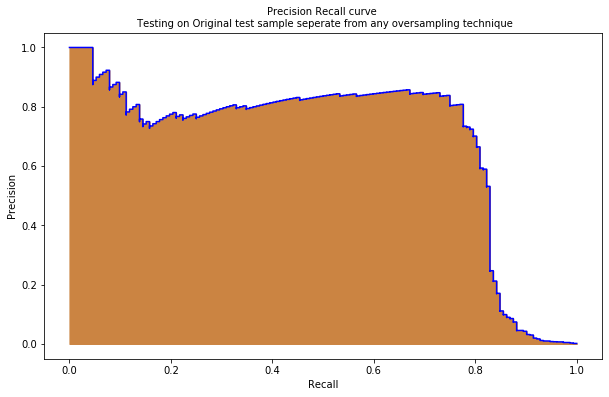

In [42]:
fig = plt.figure(figsize=(10,6))

precision, recall, threshold = precision_recall_curve(Original_Ytest,y_score)

plt.step(recall, precision, color='b',where='post')
plt.fill_between(recall, precision, step='post',color='#cb8442')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision Recall curve \n Testing on Original test sample seperate from any oversampling technique", fontsize=10)
plt.show()

In [43]:
#Time taken in case of oversampling. 
sm = SMOTE(sampling_strategy='minority',random_state=42)

Xsm_train, Ysm_train = sm.fit_sample(Original_Xtrain,Original_Ytrain)

t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, Ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :22.42203164100647 sec


### Confusion Matrix of each classifier on random undersampling data 

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

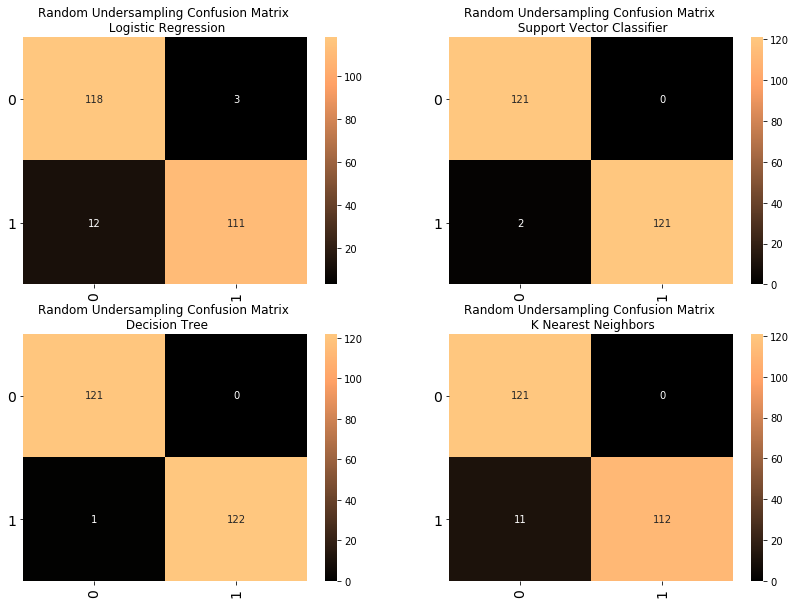

In [44]:
#Random Undersampling Confusion matrix. 
from sklearn.metrics import confusion_matrix 

y_predict_log = log_reg_sm.predict(X_test)
y_predict_svc = svc.predict(X_test)
y_predict_tree = tree_par.predict(X_test)
y_predict_knear = Knear_par.predict(X_test)

log_cm = confusion_matrix(Y_test,y_predict_log)
svc_cm = confusion_matrix(Y_test,y_predict_svc)
tree_cm = confusion_matrix(Y_test,y_predict_tree)
knear_cm = confusion_matrix(Y_test,y_predict_knear)

fig, ax = plt.subplots(2,2,figsize=(14,10))

sns.heatmap(log_cm,ax=ax[0][0],annot=True,cmap=plt.cm.copper,fmt='g')
ax[0,0].set_title("Random Undersampling Confusion Matrix \n Logistic Regression")
ax[0,0].set_xticklabels([0, 1], fontsize=14, rotation=90)
ax[0,0].set_yticklabels([0, 1], fontsize=14, rotation=360)

sns.heatmap(svc_cm,ax=ax[0][1],annot=True,cmap=plt.cm.copper,fmt='g')
ax[0,1].set_title("Random Undersampling Confusion Matrix \n Support Vector Classifier")
ax[0,1].set_xticklabels([0, 1], fontsize=14, rotation=90)
ax[0,1].set_yticklabels([0, 1], fontsize=14, rotation=360)

sns.heatmap(tree_cm,ax=ax[1][0],annot=True,cmap=plt.cm.copper,fmt='g')
ax[1,0].set_title("Random Undersampling Confusion Matrix \n Decision Tree")
ax[1,0].set_xticklabels([0, 1], fontsize=14, rotation=90)
ax[1,0].set_yticklabels([0, 1], fontsize=14, rotation=360)

sns.heatmap(knear_cm,ax=ax[1][1],annot=True,cmap=plt.cm.copper,fmt='g')
ax[1,1].set_title("Random Undersampling Confusion Matrix \n K Nearest Neighbors")
ax[1,1].set_xticklabels([0, 1], fontsize=14, rotation=90)
ax[1,1].set_yticklabels([0, 1], fontsize=14, rotation=360)

### Different Performance measures of each technique.

* One thing we can notice that though we are focusing more on recall but for customer belief we cant predict more non-fraud cases as fraud. So We will iterate through differnt ratio of SMOTE and find case which has maximum f1 score. 

In [45]:
#Performance Parameters on original test sample.

from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_predic = log_reg.predict(Original_Xtest)
undersample_score = accuracy_score(Original_Ytest, y_predic)
recall_random = recall_score(Original_Ytest, y_predic)
precision_random = precision_score(Original_Ytest, y_predic)
f1_random = f1_score(Original_Ytest, y_predic)

#UnderSampling (NearMiss)
model = undersample_pipeline.fit(Original_Xtrain,Original_Ytrain)
Y_predi = model.predict(Original_Xtest)
undersample_nearmiss_score = accuracy_score(Original_Ytest,Y_predi)
recall_nearmiss = recall_score(Original_Ytest,Y_predi)
precision_nearmiss = precision_score(Original_Ytest,Y_predi)
f1_nearmiss = f1_score(Original_Ytest,Y_predi)

# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_par.predict(Original_Xtest)
oversample_score = accuracy_score(Original_Ytest, y_pred_sm)
recall_smote = recall_score(Original_Ytest, y_pred_sm)
precision_smote = precision_score(Original_Ytest, y_pred_sm)
f1_smote = f1_score(Original_Ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling','NearMiss Undersampling', 'Oversampling (SMOTE)'], 
     'Score': [undersample_score,undersample_nearmiss_score, oversample_score],
     'Recall': [recall_random,recall_nearmiss,recall_smote],
     'Precision': [precision_random,precision_nearmiss,precision_smote],
     'f1 Score': [f1_random,f1_nearmiss,f1_smote]}
final_df = pd.DataFrame(data=d)

final_df

,Technique,Score,Recall,Precision,f1 Score
0,Random UnderSampling,0.979366,0.881579,0.071315,0.131955
1,NearMiss Undersampling,0.498449,0.947368,0.003350,0.006676
2,Oversampling (SMOTE),0.977541,0.881579,0.065848,0.122542


In [46]:
weights = np.linspace(0.005,0.50,10)

In [47]:
pipe = imbalanced_make_pipeline(SMOTE(), LogisticRegression())

grid = RandomizedSearchCV(pipe,param_distributions={'smote__sampling_strategy':weights},scoring='f1',cv=3)

model = grid.fit(Original_Xtrain,Original_Ytrain)
print('Best Weights: ',model.best_params_)


Best Weights:  {'smote__sampling_strategy': 0.005}


### Maximizing f1 score by changing different ratio of SMOTE.

In [48]:
pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy=0.005), LogisticRegression())
pipeline.fit(Original_Xtrain,Original_Ytrain)
y_pdct = pipeline.predict(Original_Xtest)

oversample_score = accuracy_score(Original_Ytest, y_pdct)
recall_smote = recall_score(Original_Ytest, y_pdct)
precision_smote = precision_score(Original_Ytest, y_pdct)
f1_smote = f1_score(Original_Ytest, y_pdct)

result = pd.DataFrame({'Technique': ['Oversampling (SMOTE)'], 
     'Score': [oversample_score], 
     'Recall': [recall_smote],
     'Precision': [precision_smote],
     'f1 Score': [f1_smote]})
result

,Technique,Score,Recall,Precision,f1 Score
0,Oversampling (SMOTE),0.999181,0.763158,0.773333,0.768212
